In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
pth_lid_tmp_k             = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/fgsm/LIDNOISE/lid_tmp_k"
pth_lid_tmp_k_adv         = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/fgsm/LIDNOISE/lid_tmp_k_adv"
pth_lid_tmp_k_noise       = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/fgsm/LIDNOISE/lid_tmp_k_noise"
pth_lid_tmp_k_noise_adv   = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/fgsm/LIDNOISE/lid_tmp_k_noise_adv"
pth_characteristics_noise = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/fgsm/LIDNOISE/characteristics_noise"
pth_characteristics_noise_adv = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/fgsm/LIDNOISE/characteristics_noise_adv"

pth_characteristics = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/fgsm/LIDNOISE/characteristics"

In [3]:
lid_tmp_k             = torch.load(pth_lid_tmp_k)
lid_tmp_k_adv         = torch.load(pth_lid_tmp_k_adv)
lid_tmp_k_noise       = torch.load(pth_lid_tmp_k_noise)
# lid_tmp_k_noise_adv   = torch.load(pth_lid_tmp_k_noise_adv)
characteristics_noise = torch.load(pth_characteristics_noise)
# characteristics_noise_adv = torch.load(pth_characteristics_noise_adv)

In [4]:
lid_tmp_k.shape

(2000, 20, 13)

In [5]:
lid_tmp_k_adv.shape

(2000, 20, 13)

In [6]:
characteristics = torch.load(pth_characteristics)

In [7]:
characteristics.shape

(20,)

In [8]:
attacks = ['fgsm', 'bim', 'pgd', 'std/8_255',  'df', 'cw']
labels  = ['fgsm', 'bim', 'pgd',  'aa',        'df', 'cw']

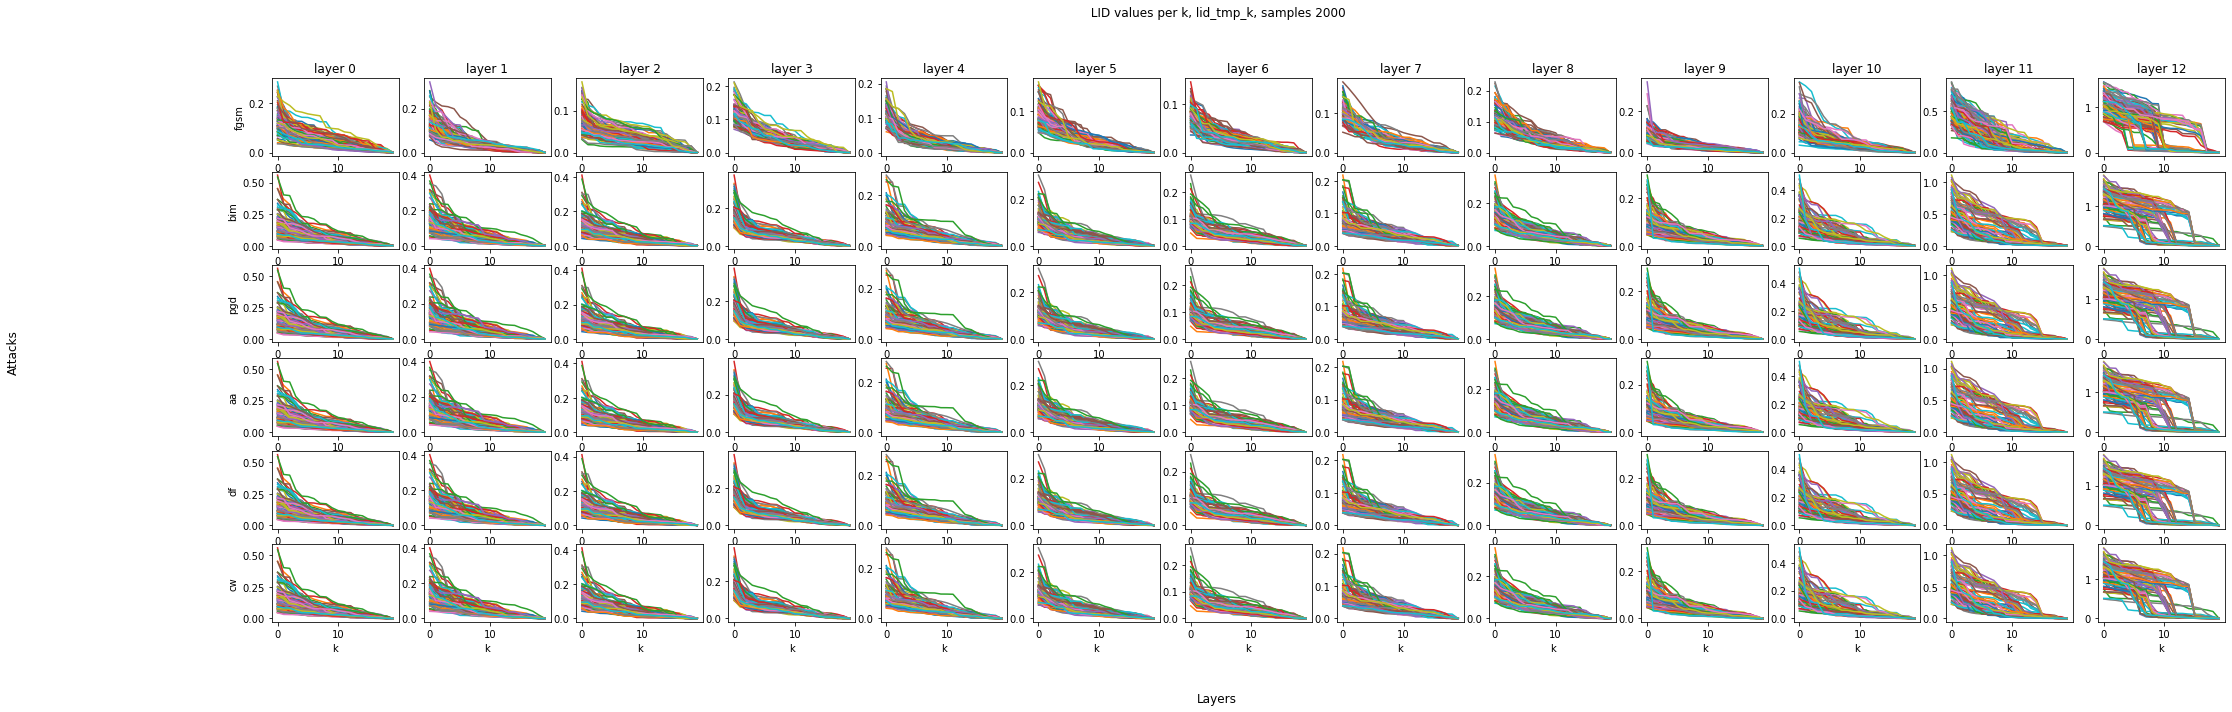

In [9]:
# packages =  ['lid_tmp_k', 'lid_tmp_k_adv', 'lid_tmp_k_noise']
packages =  ['lid_tmp_k']

for package in packages:
    dict_lid_tmp_k = {}
    
    for att in attacks:
        pth_tmp             = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format(att, package)
        dict_lid_tmp_k[att] = torch.load(pth_tmp)

    fig2, axs2 = plt.subplots( len(attacks), lid_tmp_k_adv.shape[2], figsize=(35, 10) )

    fig2.suptitle(" LID values per k, {}, samples {}".format( package, lid_tmp_k_adv.shape[0] ) )
    fig2.supxlabel('Layers')
    fig2.supylabel('Attacks')

    for it, att in enumerate(attacks): 
        for layer in range(13):
            if it == 0:
                axs2[ it, layer ].set_title("layer {}".format(layer))
            if layer == 0:
                axs2[ it, layer ].set_ylabel( labels[it] )

            if att == 'cw':
                axs2[ it, layer ].set_xlabel( "k" )


            for k_sample in range(100):
                axs2[ it, layer ].plot( dict_lid_tmp_k[att][k_sample, : ,  layer] )
                # axs2[ it, layer ].plot(  dict_lid_tmp_k[att][k_sample, : ,  layer] )


    # fig2.savefig("plots/lines/{}.svg".format(package))

In [10]:
arr = dict_lid_tmp_k['fgsm']
arr.shape

(2000, 20, 13)

In [11]:
arr_mean  = np.mean(arr, axis=0)
arr_std   = np.std(arr, axis=0)

In [12]:
dict_lid_tmp_k['fgsm'].reshape(2000, -1)

array([[ 0.13814078,  0.11775333,  0.06521679, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.24303398,  0.21923475,  0.09668604, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.11633016,  0.1860406 ,  0.07217919, ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.10245222,  0.09668642,  0.07664793, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.1201022 ,  0.23064908,  0.13268375, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.08759458,  0.13834643,  0.04787467, ..., -0.        ,
        -0.        , -0.        ]], dtype=float32)

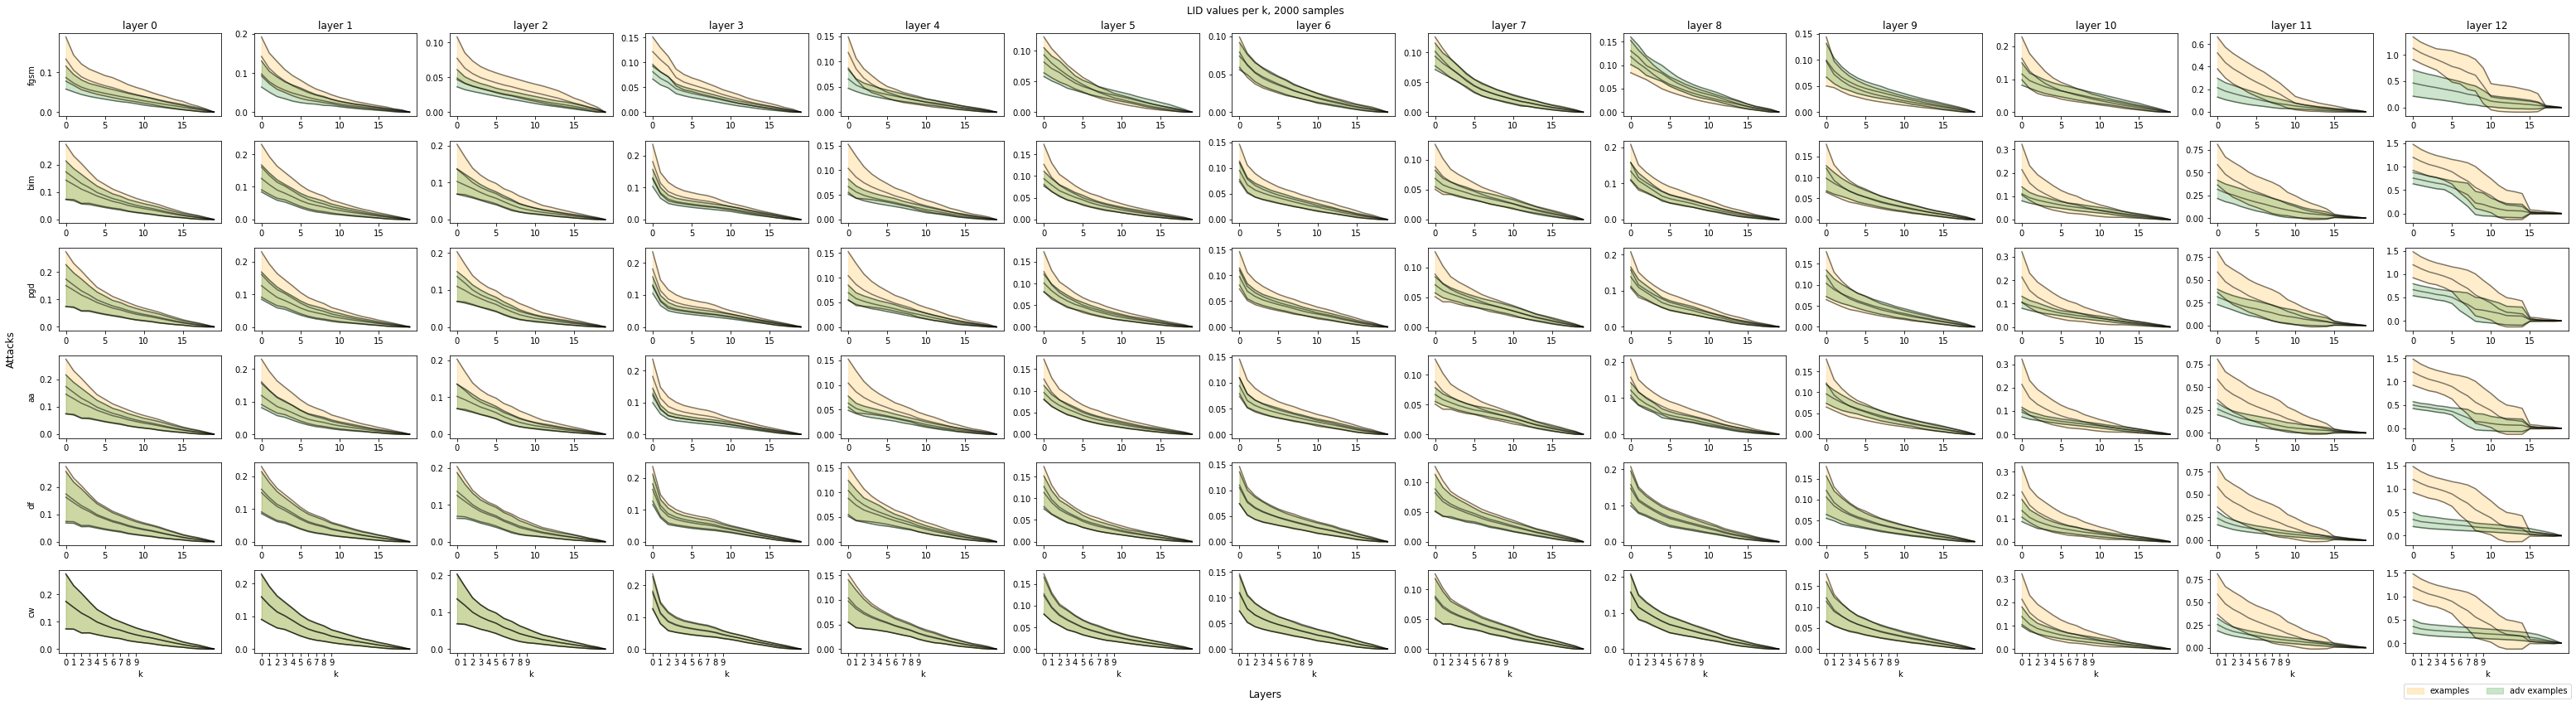

In [13]:
# packages =  ['lid_tmp_k', 'lid_tmp_k_adv', 'lid_tmp_k_noise']
packages =  ['lid_tmp_k', 'lid_tmp_k_adv']

fig2, axs2 = plt.subplots( len(attacks), lid_tmp_k_adv.shape[2], figsize=(44, 12) )

fig2.suptitle("LID values per k, {} samples".format( lid_tmp_k_adv.shape[0] ) )
fig2.supxlabel('Layers')
fig2.supylabel('Attacks')

col1 = None
col2 = None

for package in packages:
    dict_lid_tmp_k = {}
    
    for att in attacks:
        pth_tmp             = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format(att, package)
        dict_lid_tmp_k[att] = torch.load(pth_tmp)



    for it, att in enumerate(attacks): 
        arr = dict_lid_tmp_k[att]
        arr_mean  = np.mean(arr, axis=0)
        arr_std   = np.std(arr, axis=0)
        
        
        for layer in range(13):
            if it == 0:
                axs2[ it, layer ].set_title("layer {}".format(layer))
            if layer == 0:
                axs2[ it, layer ].set_ylabel( labels[it] )

            if att == 'cw':
                axs2[ it, layer ].set_xlabel( "k" )
            
            arr_mean_layer = arr_mean[:, layer]
            arr_std_layer  = arr_std[:, layer]
            
            arr_x = np.arange(arr_mean_layer.shape[0])
            if package == 'lid_tmp_k':
               col1 = axs2[ it, layer ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='orange', alpha=0.2, label='examples' )
            else:
               col2 =  axs2[ it, layer ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='green', alpha=0.2, label='adv examples' )
                
            axs2[ it, layer ].plot( arr_mean_layer, 'k-', alpha=0.5)
            axs2[ it, layer ].plot( arr_mean_layer - arr_std_layer, 'k-', alpha=0.5 )
            axs2[ it, layer ].plot( arr_mean_layer + arr_std_layer, 'k-', alpha=0.5 )
            
            # axs2[ it, layer ].set_ylim([0, 1])
            
            if it == 5:
                axs2[ it, layer ].set_xticks([0,1,2,3,4,5,6,7,8,9])
                
                
fig2.tight_layout()
# plt.subplot_tool()
fig2.subplots_adjust(left=0.04)

# plt.legend(["examples", "adv examples"], loc="lower center", bbox_to_anchor=(0.5, -0.6), ncol=2)
plt.legend(handles=[col1, col2], loc="lower center", bbox_to_anchor=(0.5, -0.6), ncol=2)

# fig2.savefig("plots/lines/mean_std{}.svg".format("lid"))

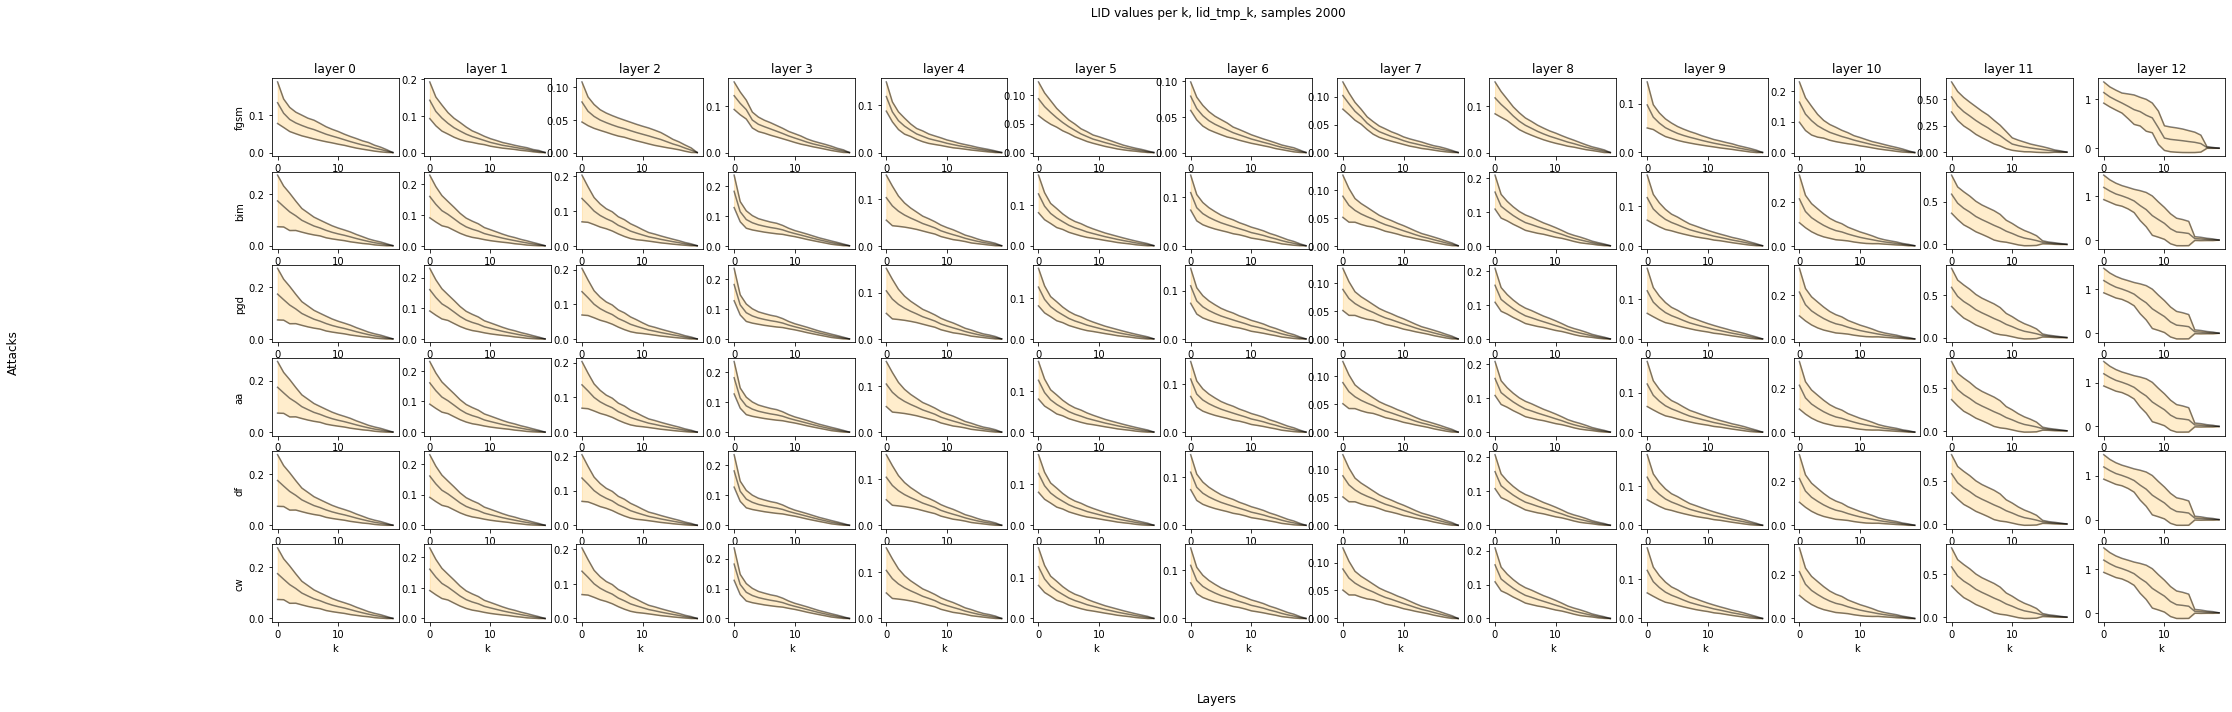

In [14]:
# packages =  ['lid_tmp_k', 'lid_tmp_k_adv', 'lid_tmp_k_noise']
packages =  ['lid_tmp_k']


# Run local implementation of kmeans

for package in packages:
    dict_lid_tmp_k = {}
    
    for att in attacks:
        pth_tmp             = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format(att, package)
        dict_lid_tmp_k[att] = torch.load(pth_tmp)

    fig2, axs2 = plt.subplots( len(attacks), lid_tmp_k_adv.shape[2], figsize=(35, 10) )

    fig2.suptitle(" LID values per k, {}, samples {}".format( package, lid_tmp_k_adv.shape[0] ) )
    fig2.supxlabel('Layers')
    fig2.supylabel('Attacks')

    for it, att in enumerate(attacks): 
        arr = dict_lid_tmp_k[att]
        
        arr_mean  = np.mean(arr, axis=0)
        arr_std   = np.std(arr, axis=0)
        arr_x = np.arange(arr_mean_layer.shape[0])
        
        for layer in range(13):
            if it == 0:
                axs2[ it, layer ].set_title("layer {}".format(layer))
            if layer == 0:
                axs2[ it, layer ].set_ylabel( labels[it] )

            if att == 'cw':
                axs2[ it, layer ].set_xlabel( "k" )
            
            
            # Standardize the data
            X_std = StandardScaler().fit_transform(arr[:, 0,:])
            km = KMeans(n_clusters=10, max_iter=100)
            km.fit(X_std)
            centroids = km.cluster_centers_
            
            arr_mean_layer = arr_mean[:, layer]
            arr_std_layer  = arr_std[:, layer]
            
            axs2[ it, layer ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='orange', alpha=0.2 )
            
            axs2[ it, layer ].plot( arr_mean_layer, 'k-', alpha=0.5)
            axs2[ it, layer ].plot( arr_mean_layer - arr_std_layer, 'k-', alpha=0.5 )
            axs2[ it, layer ].plot( arr_mean_layer + arr_std_layer, 'k-', alpha=0.5 )


    # fig2.savefig("plots/lines/{}.svg".format(package))

In [15]:
km.cluster_centers_.shape

(10, 13)

In [16]:
arr.shape

(2000, 20, 13)

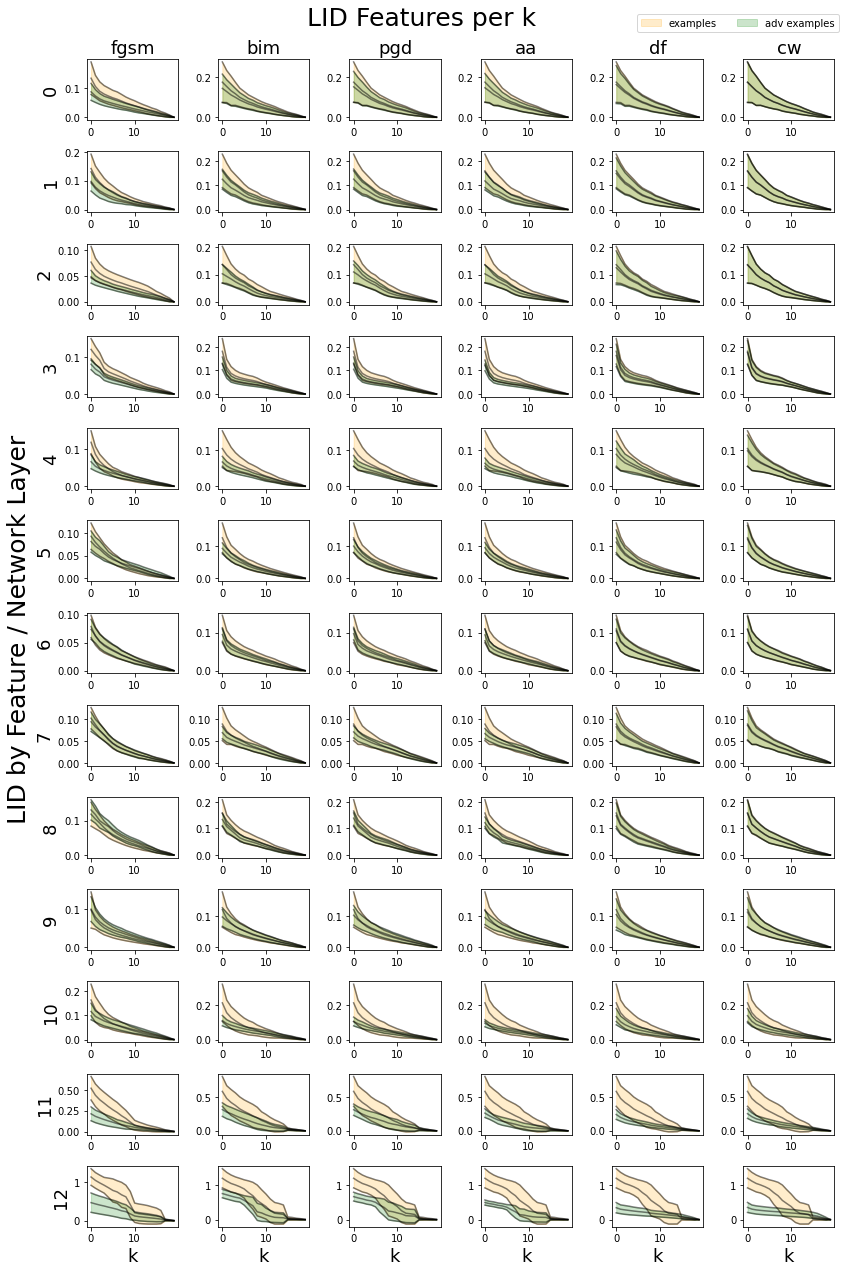

In [19]:
# packages =  ['lid_tmp_k', 'lid_tmp_k_adv', 'lid_tmp_k_noise']
packages =  ['lid_tmp_k', 'lid_tmp_k_adv']
# packages =  ['lid_tmp_k']

fig2, axs2 = plt.subplots( lid_tmp_k_adv.shape[2], len(attacks), figsize=(12, 18) )

col1 = None
col2 = None

for package in packages:
    dict_lid_tmp_k = {}
    
    for att in attacks:
        pth_tmp             = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format(att, package)
        dict_lid_tmp_k[att] = torch.load(pth_tmp)

    for it, att in enumerate(attacks): 
        arr = dict_lid_tmp_k[att]
        arr_mean  = np.mean(arr, axis=0)
        arr_std   = np.std(arr, axis=0)
        
        for layer in range(13):
            if layer == 0:
                axs2[ layer, it ].set_title( labels[it] , fontsize=18 ) 
                
            if it == 0:
                axs2[ layer, it ].set_ylabel( "{}".format(layer) , fontsize=18 )
            #     axs2[ layer, it ].set_xlabel( labels[it] )
                
            if layer == 12:
                axs2[ layer, it ].set_xlabel( "k" , fontsize=18 )
                # axs2[ layer, it ].set_xticks([0,1,2,3,4,5,6,7,8,9])
            
            arr_mean_layer = arr_mean[:, layer]
            arr_std_layer  = arr_std[:, layer]
            
            arr_x = np.arange(arr_mean_layer.shape[0])
            if package == 'lid_tmp_k':
               col1 = axs2[ layer, it ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='orange', alpha=0.2, label='examples' )
            else:
               col2 = axs2[ layer, it ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='green', alpha=0.2, label='adv examples' )
                
            axs2[ layer, it ].plot( arr_mean_layer                , 'k-', alpha=0.5 )
            axs2[ layer, it ].plot( arr_mean_layer - arr_std_layer, 'k-', alpha=0.5 )
            axs2[ layer, it ].plot( arr_mean_layer + arr_std_layer, 'k-', alpha=0.5 )    

            
fig2.suptitle("LID Features per k".format( lid_tmp_k_adv.shape[0] ) , fontsize=25 )
# fig2.supxlabel('Attacks', fontsize=25)
fig2.supylabel('LID by Feature / Network Layer', fontsize=25)
fig2.tight_layout(rect=[0, 0, 0.99, 0.99])
# plt.subplot_tool()
# fig2.subplots_adjust(top=0.04)

# plt.legend(["examples", "adv examples"], loc="lower center", bbox_to_anchor=(1.2, -0.1), ncol=2)
plt.legend(handles=[col1, col2], loc="upper right", bbox_to_anchor=(1.1, 20),  ncol=2)

# fig2.savefig("plots/lines/mean_std{}.svg".format("lid"))

In [20]:
fig2.savefig("plots/lines/mean_std{}_k20.svg".format("lid"))

AttributeError: 'NoneType' object has no attribute 'get_label'

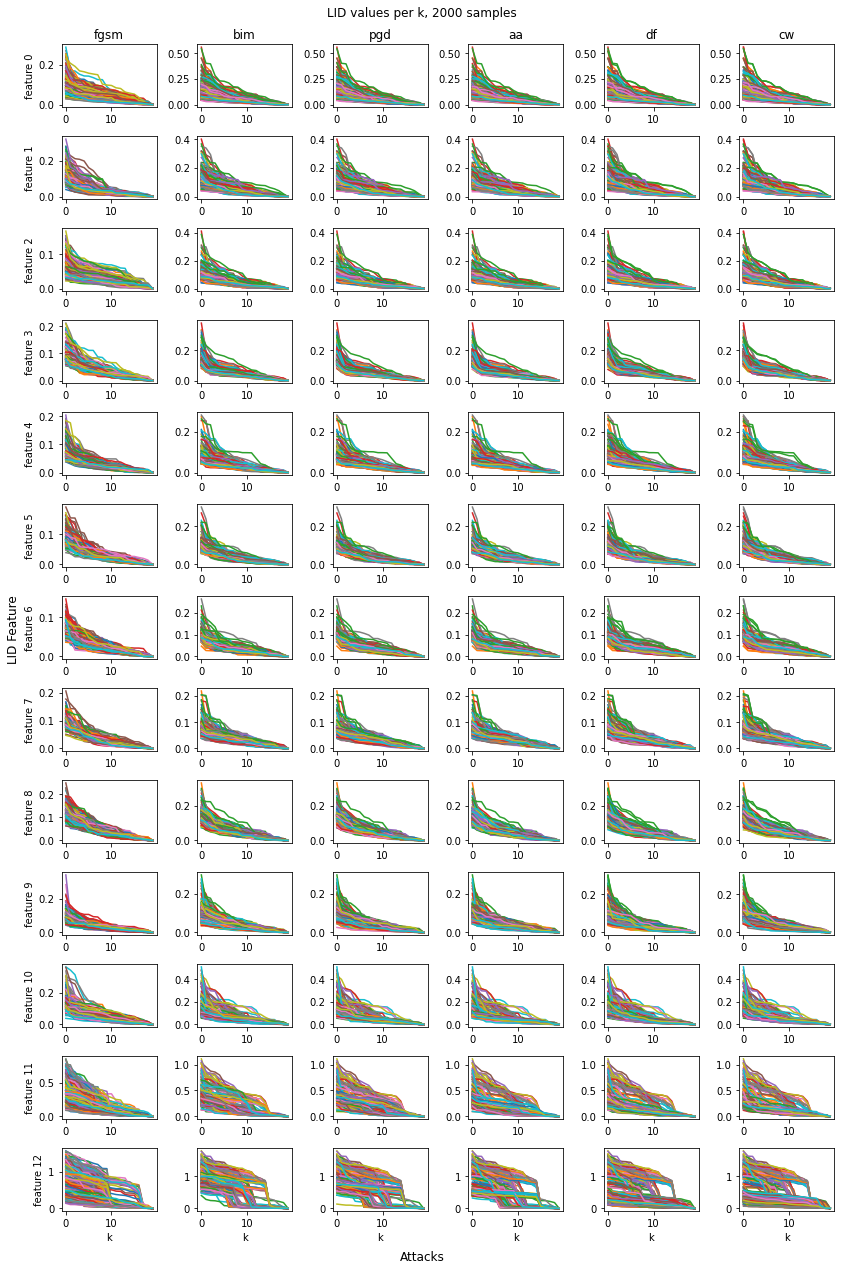

In [42]:
# packages =  ['lid_tmp_k', 'lid_tmp_k_adv', 'lid_tmp_k_noise']
packages =  ['lid_tmp_k', 'lid_tmp_k_adv']
# packages =  ['lid_tmp_k']

fig2, axs2 = plt.subplots( lid_tmp_k_adv.shape[2], len(attacks), figsize=(12, 18) )

col1 = None
col2 = None

for package in packages:
    dict_lid_tmp_k = {}
    
    for att in attacks:
        pth_tmp             = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format(att, package)
        dict_lid_tmp_k[att] = torch.load(pth_tmp)

    for it, att in enumerate(attacks): 
        arr = dict_lid_tmp_k[att]
        arr_mean  = np.mean(arr, axis=0)
        arr_std   = np.std(arr, axis=0)
        
        for layer in range(13):
            if layer == 0:
                axs2[ layer, it ].set_title( labels[it] ) 
                
            if it == 0:
                axs2[ layer, it ].set_ylabel( "feature {}".format(layer) )
            #     axs2[ layer, it ].set_xlabel( labels[it] )
                
            if layer == 12:
                axs2[ layer, it ].set_xlabel( "k" )
                # axs2[ layer, it ].set_xticks([0,1,2,3,4,5,6,7,8,9])
            
            
            for k_sample in range(100):
                axs2[ layer, it ].plot( dict_lid_tmp_k[att][k_sample, : ,  layer] )

            
fig2.suptitle("LID values per k, {} samples".format( lid_tmp_k_adv.shape[0] ) )
fig2.supxlabel('Attacks')
fig2.supylabel('LID Feature')
fig2.tight_layout(rect=[0, 0, 0.99, 0.99])
# plt.subplot_tool()
# fig2.subplots_adjust(top=0.04)

# plt.legend(["examples", "adv examples"], loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.legend(handles=[col1, col2], loc="lower center", bbox_to_anchor=(0.0, -0.7),  ncol=2)

# fig2.savefig("plots/lines/mean_std{}.svg".format("lid"))

In [44]:
dict_lid = {}
packages =  ['lid_tmp_k', 'lid_tmp_k_adv']
pth_tmp             = "./../data/extracted_characteristics/run_2/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format('fgsm', 'lid_tmp_k')
pth_tmp_adv         = "./../data/extracted_characteristics/run_2/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format('fgsm', 'lid_tmp_k_adv')
dict_lid['clean'] = torch.load(pth_tmp)
dict_lid['fgsm']  = torch.load(pth_tmp_adv)

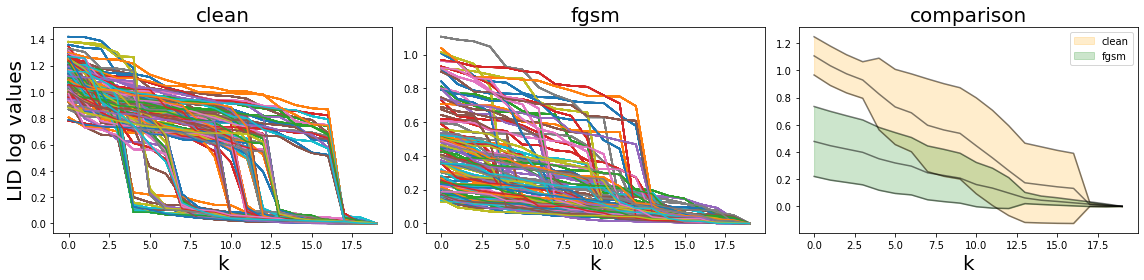

In [55]:
fig2, axs2 = plt.subplots( 1, 3, figsize=(16, 4) )


# fig2.set_title(" LID feature values of feature 12 " )

for it1, att in enumerate(['clean', 'fgsm', 'comparison']):
    
    
    axs2[ it1 ].set_title(att, fontsize=20)
    
    if att in ['clean', 'fgsm']:
        for k_sample in range(2000):
            axs2[ it1 ].plot( dict_lid[att][k_sample, : ,  -1] )
    else:
        for att in ['clean', 'fgsm']:
            arr = dict_lid[att]
            arr_mean  = np.mean(arr, axis=0)
            arr_std   = np.std(arr, axis=0)

            arr_mean_layer = arr_mean[:, -1]
            arr_std_layer  = arr_std[:, -1]

            arr_x = np.arange(arr_mean_layer.shape[0])
            if att == 'clean':
                col1 = axs2[ it1 ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='orange', alpha=0.2, label='clean' )
            else:
                col2 = axs2[ it1 ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='green', alpha=0.2, label='fgsm' )

            axs2[ it1 ].plot( arr_mean_layer                , 'k-', alpha=0.5 )
            axs2[ it1 ].plot( arr_mean_layer - arr_std_layer, 'k-', alpha=0.5 )
            axs2[ it1 ].plot( arr_mean_layer + arr_std_layer, 'k-', alpha=0.5 )    
            
            axs2[ it1 ].legend()
    
    axs2[ it1 ].set_xlabel( "k" , fontsize=20)
    
    if it1 == 0:
        axs2[ it1 ].set_ylabel( "multiLID log values",fontsize=20)   
    

fig2.tight_layout()

In [57]:
fig2.savefig("plots/lines/fgsm_example_{}_k20.svg".format("lid"))

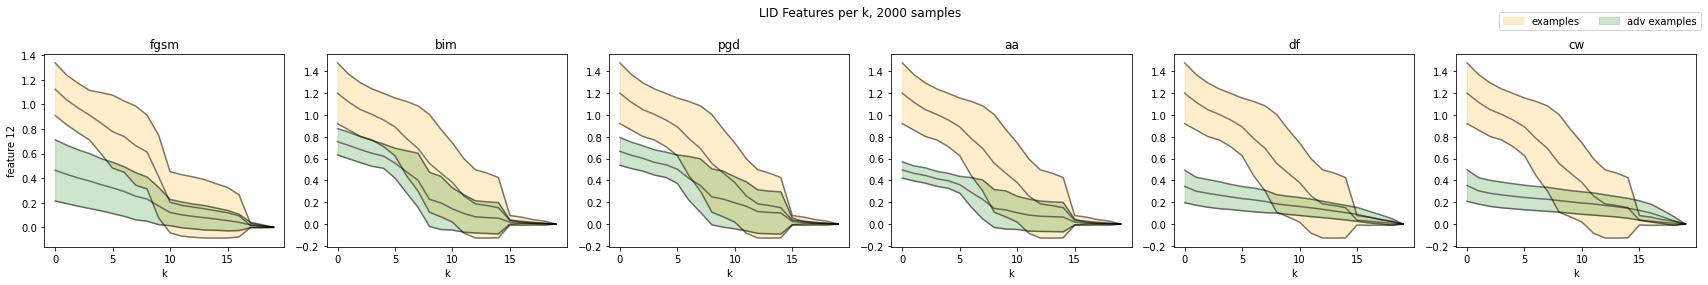

In [43]:
# packages =  ['lid_tmp_k', 'lid_tmp_k_adv', 'lid_tmp_k_noise']
packages =  ['lid_tmp_k', 'lid_tmp_k_adv']
# packages =  ['lid_tmp_k']

fig2, axs2 = plt.subplots( 1, len(attacks), figsize=(24, 4) )

col1 = None
col2 = None

for package in packages:
    dict_lid_tmp_k = {}
    
    for att in attacks:
        pth_tmp             = "./../data/extracted_characteristics/run_1/cif10/wrn_28_10_10/{}/LIDNOISE/{}".format(att, package)
        dict_lid_tmp_k[att] = torch.load(pth_tmp)

    for it, att in enumerate(attacks): 
        arr = dict_lid_tmp_k[att]
        arr_mean  = np.mean(arr, axis=0)
        arr_std   = np.std(arr, axis=0)
        
        axs2[ it ].set_title( labels[it] ) 
                
        if it == 0:
            axs2[ it ].set_ylabel( "feature {}".format(12) )
        
        axs2[ it ].set_xlabel( "k" )

        arr_mean_layer = arr_mean[:, -1]
        arr_std_layer  = arr_std[:, -1]

        arr_x = np.arange(arr_mean_layer.shape[0])
        if package == 'lid_tmp_k':
           col1 = axs2[ it ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='orange', alpha=0.2, label='examples' )
        else:
           col2 = axs2[  it ].fill_between(arr_x, arr_mean_layer - arr_std_layer, arr_mean_layer + arr_std_layer, color='green', alpha=0.2, label='adv examples' )

        axs2[ it ].plot( arr_mean_layer                , 'k-', alpha=0.5 )
        axs2[ it ].plot( arr_mean_layer - arr_std_layer, 'k-', alpha=0.5 )
        axs2[ it ].plot( arr_mean_layer + arr_std_layer, 'k-', alpha=0.5 )    

            
fig2.suptitle("LID Features per k, {} samples".format( lid_tmp_k_adv.shape[0] ) )
# fig2.supxlabel('Attacks')
# fig2.supylabel('feature 12')
fig2.tight_layout(rect=[0, 0, 0.99, 0.99])
# plt.subplot_tool()
# fig2.subplots_adjust(top=0.04)

# plt.legend(["examples", "adv examples"], loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.legend(handles=[col1, col2], loc="lower center", bbox_to_anchor=(0.6, 1.1),  ncol=2)

# fig2.savefig("plots/lines/mean_std{}.svg".format("lid"))

In [145]:
fig2.savefig("plots/lines/mean_std_12{}.svg".format("lid"))